In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Cargar base de datos
from google.colab import files
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_excel(file_name)

Saving base_datos_limpia_8marzo.xlsx to base_datos_limpia_8marzo.xlsx


In [ ]:
# Definir variabes
X = df.drop(columns=["precio por m2", "precio", "fecha"])
y = df["precio por m2"]

# Identificar variables numéricas y categóricas
num_features = ["Piso", "superficie", "nº habitaciones", "nº baños", "ascensor", "parking", "trastero", "densidad poblacional"]
cat_features = ["Distrito"]

XGBoost - MAE: 615.174383834792, RMSE: 847.5844823371069, R²: 0.7812288853650764
 R² Entrenamiento: 0.8281
 R² Prueba: 0.7812
 Diagnóstico: Buen Ajuste


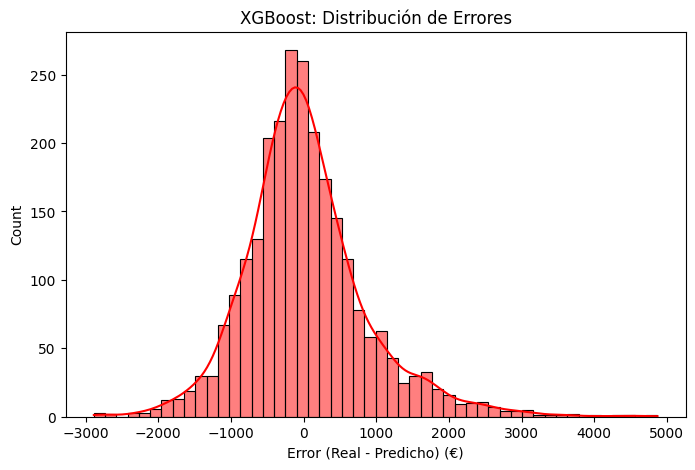

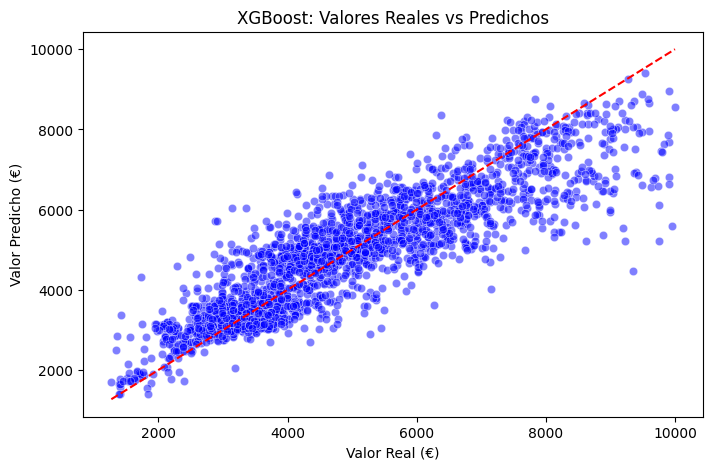

<ipython-input-5-4a293870b2b3>:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette="magma")


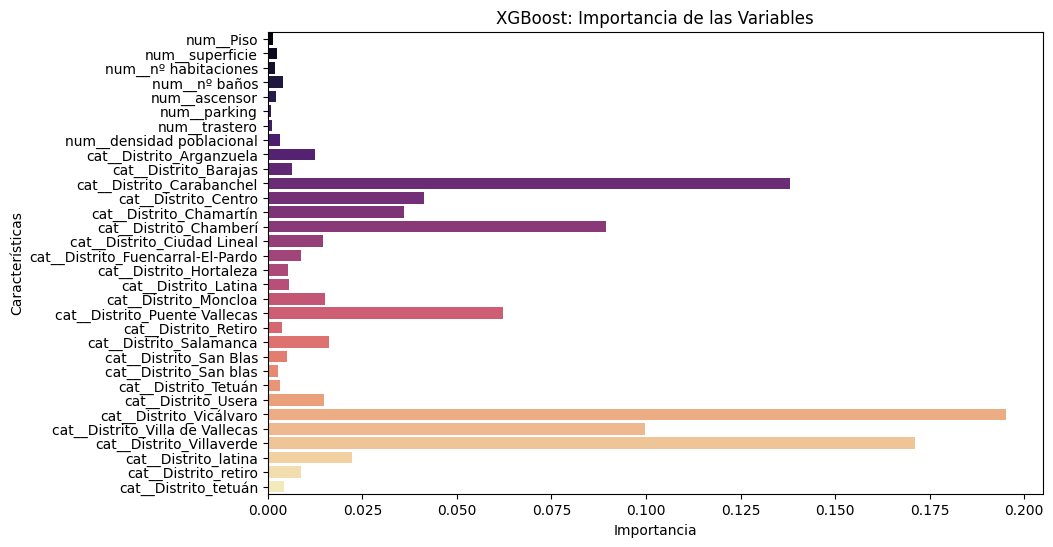

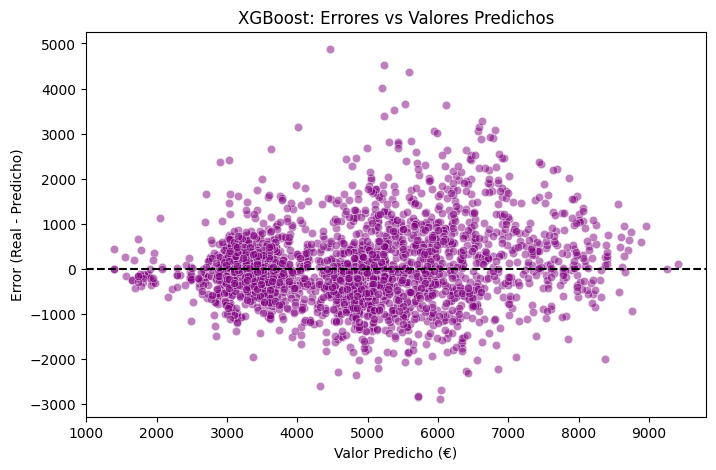

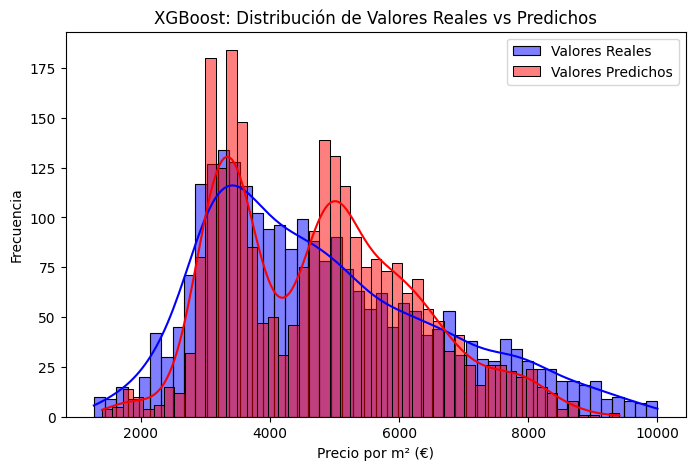

In [ ]:
# Escalado para numéricas y one-hot encoding para categóricas
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), num_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
])

# Separar en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de XGBoost con hiperparámetros iniciales
xgb_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42))
])

# Entrenar modelo
xgb_pipeline.fit(X_train, y_train)
y_pred = xgb_pipeline.predict(X_test)

# Evaluar modelo
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"XGBoost - MAE: {mae}, RMSE: {rmse}, R²: {r2}")
#  Calcular R² en entrenamiento y prueba para XGBoost
y_train_pred = xgb_pipeline.predict(X_train)
r2_train_xgb = r2_score(y_train, y_train_pred)
r2_test_xgb = r2_score(y_test, y_pred)

#  Función para detectar overfitting
def detect_overfitting(r2_train, r2_test, threshold=0.1):
    if r2_train - r2_test > threshold:
        return "Posible Overfitting (El modelo se ajusta demasiado a los datos de entrenamiento)"
    elif r2_test > r2_train:
        return "Posible Underfitting (El modelo no capta bien los patrones)"
    else:
        return "Buen Ajuste"

#  Diagnóstico del modelo
diagnostico_xgb = detect_overfitting(r2_train_xgb, r2_test_xgb)

#  Mostrar resultados
print(f" R² Entrenamiento: {r2_train_xgb:.4f}")
print(f" R² Prueba: {r2_test_xgb:.4f}")
print(f" Diagnóstico: {diagnostico_xgb}")


# Gráfico de distribución de errores
errors = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(errors, bins=50, kde=True, color="red")
plt.title("XGBoost: Distribución de Errores")
plt.xlabel("Error (Real - Predicho) (€)")
plt.show()
#  1️ Valores Reales vs Predichos
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color="blue")
plt.title("XGBoost: Valores Reales vs Predichos")
plt.xlabel("Valor Real (€)")
plt.ylabel("Valor Predicho (€)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")  # Línea de referencia perfecta
plt.show()
#  2️ Importancia de Variables en XGBoost
xgb_model = xgb_pipeline.named_steps["model"]
importances = xgb_model.feature_importances_
feature_names = preprocessor.get_feature_names_out()

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names, palette="magma")
plt.title("XGBoost: Importancia de las Variables")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.show()
# 3 Gráfico de Errores vs Valores Reales
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=errors, alpha=0.5, color="purple")
plt.axhline(0, color='black', linestyle='dashed')
plt.title("XGBoost: Errores vs Valores Predichos")
plt.xlabel("Valor Predicho (€)")
plt.ylabel("Error (Real - Predicho)")
plt.show()
#  4️ Distribución de Valores Reales vs Predichos
plt.figure(figsize=(8, 5))
sns.histplot(y_test, bins=50, kde=True, color="blue", label="Valores Reales")
sns.histplot(y_pred, bins=50, kde=True, color="red", label="Valores Predichos", alpha=0.5)
plt.title("XGBoost: Distribución de Valores Reales vs Predichos")
plt.xlabel("Precio por m² (€)")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()
